In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

from matplotlib import colors
from ipywidgets import interact

In [338]:
log_path = "logs_635773524622931010"
df = pd.read_csv("%s/weights.csv" % log_path, header=None)

In [343]:
# there are 120,000 synapses total
# 20,000 for each input layer, going to each output layer, in excitatory+inhibitory pairs
# of those 20,000 are 200 outgoing from each input neuron

layer_size = 100
layer_size_2 = layer_size**2
layer_count = 6

weight_min = -4.0
weight_max = 4.0
norm = colors.Normalize(vmin=weight_min, vmax=weight_max)

layer_names = [
    "I:H (I)",
    "I:H (E)",
    "I:O (I)",
    "I:O (E)",
    "H:O (I)",
    "H:O (E)",
]

def plot_weights(f):
    fig, axs = plt.subplots(layer_count, 1, sharex=True, sharey=True, figsize=(16, 4))
    axs = axs.ravel();

    w = df.values[f]

    for i in range(layer_count):
        layer_start = i * layer_size_2
        layer_end = layer_start + layer_size_2
        layer_w = w[layer_start:layer_end]
        #layer_w = np.reshape(layer_w, (layer_size, layer_size))
        layer_w = np.reshape(layer_w, (10, 1000), "F")

        ax = axs[i]
        im = ax.imshow(layer_w, interpolation='none', cmap='Spectral', aspect='equal', norm=norm)

        ax.set_title(layer_names[i])
        ax.grid(False)

    plt.tight_layout()
    fig.colorbar(im, ax=list(axs.ravel()))

None

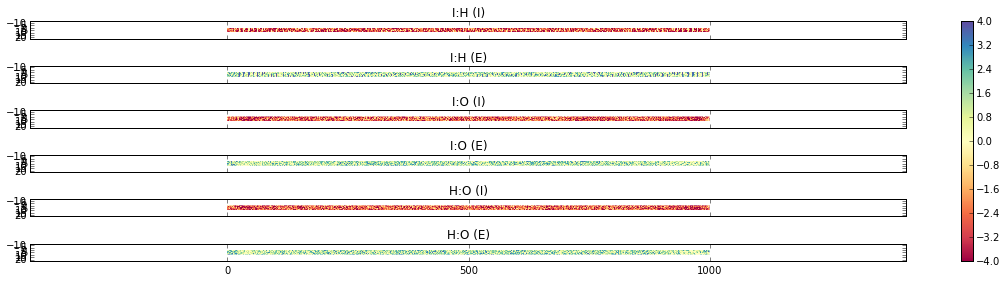

In [344]:
if len(df.values) == 1:
    _ = plot_weights(0)
else:
    _ = interact(plot_weights, f=(0, len(df.values) - 1))